## Pie Chart

#### We can clearly observe the major groups from Type_1 feature with more number of belonging Pokemons. 

#### Now, let us compare the Attack, Defence, Speed and HP of top 4 major groups for our next analysis. These characteristics define following traits:

- Attack: Aggressiveness

- Defence: Safeguarding

- Speed: Swiftness

- HP: Number of hits a Pokemon can receive before it faints

In [38]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('pokemon_alopez247.csv')

#### Also, we select only these 4 features out of the complete dataframe to reduce time complexity.

In [40]:
df_pie = df[['Type_1', 'Attack', 'Defense', 'Speed', 'HP']].copy()
print(df_pie.head())

  Type_1  Attack  Defense  Speed  HP
0  Grass      49       49     45  45
1  Grass      62       63     60  60
2  Grass      82       83     80  80
3   Fire      52       43     65  39
4   Fire      64       58     80  58


#### Next, we find the frequency of each group using the `value_count()` command thereby, select top 4 most frequent groups.

In [41]:
frequent_grp = df_pie['Type_1'].value_counts().head(4).reset_index().to_numpy()
print(frequent_grp)

[['Water' 105]
 ['Normal' 93]
 ['Grass' 66]
 ['Bug' 63]]


#### From the frequent_grp array we can observe that topmost four frequent groups are Water, Normal, Grass and Bug. 

#### We can now select the 4 listed features (Attack, Defence, Speed and HP) corresponding to these groups.

In [42]:
type_1_names = frequent_grp[:, 0]

print(type_1_names)

['Water' 'Normal' 'Grass' 'Bug']


In [43]:
regex_string = '|'.join(type_1_names)

print(regex_string)

Water|Normal|Grass|Bug


In [44]:
df_pie_filtered = df_pie[df_pie['Type_1'].str.contains(regex_string)]

In [45]:
df_grp = df_pie_filtered.groupby('Type_1').mean(numeric_only=True)

print(df_grp)

           Attack    Defense      Speed         HP
Type_1                                            
Bug     65.222222  67.698413  60.063492  55.952381
Grass   70.909091  69.363636  59.893939  66.196970
Normal  71.731183  57.795699  69.655914  76.526882
Water   71.047619  70.485714  65.009524  70.866667


### The variable df_grp stores the mean value of each feature corresponding to all four groups. 

#### Now, let us plot a visualization using pie charts for more clarification.

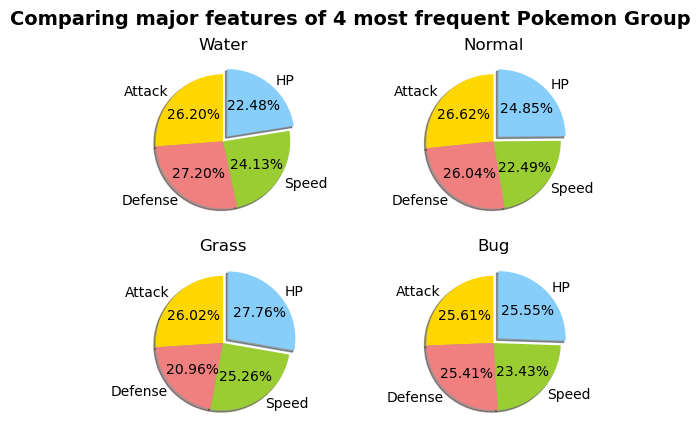

In [46]:
names = df_grp.columns
colors = ['gold', 'lightcoral', 
              'yellowgreen', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # takes out only the 4th slice 
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
ax = [ax1, ax2, ax3, ax4]
for i in range(0,4):
    percent = df_grp.iloc[i,:]
    ax[i].pie(percent, explode = explode,
            labels = names, colors = colors,
            autopct='%.2f%%',   # display value
            shadow=True,
            startangle=90)
    ax[i].set_aspect('equal')
    ax[i].set_title(type_1_names[i])
plt.suptitle('Comparing major features of 4 most frequent Pokemon Group',
             fontsize = 14,
             fontweight = 'bold')

plt.show()

### From the chart, we can state the following about the given groups of Pokemon:

- Fastest group: Grass Type

- Aggressive group: Normal Type

- Defensive group: Water Type

- Strongest Group: Grass Type